In [1]:
import numpy as np
from scipy import stats

# Data from CSV
gostaresh = [1300, 1335, 1335, 1335, 1335, 1345, 1345, 1345, 1345, 1345, 
             1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 
             1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 1370, 
             1390, 1390, 1390, 1390, 1390, 1390, 1390, 1390, 1390, 1390]

topsis_scores = [0.835545644, 
                 0.201943199, 0.235173207, 0.270229955, 0.294195124, 
                 0.187763478, 0.239610364, 0.284391541, 0.288185939, 0.326358014, 
                 0.172131323, 0.203132615, 0.217541748, 0.270579753, 0.502819894, 0.172131323, 0.203132615, 0.217541748, 0.270579753, 0.502819894, 0.172131323, 0.203132615, 0.217541748, 0.270579753, 
                 0.130603796, 0.171109246, 0.205853588, 0.255497672, 0.338248538, 0.130603796, 0.171109246, 0.205853588, 0.255497672, 0.338248538, 0.130603796, 0.171109246, 0.205853588, 0.255497672, 0.338248538, 
                 0.13296516, 0.17695572, 0.196896703, 0.249181004, 0.293846707, 0.13296516, 0.17695572, 0.196896703, 0.249181004, 0.293846707]

# Group data
data_by_gostaresh = {}
for g, score in zip(gostaresh, topsis_scores):
    if g not in data_by_gostaresh:
        data_by_gostaresh[g] = []
    data_by_gostaresh[g].append(score)

# Welch's ANOVA
welch_statistic, welch_pvalue = stats.f_oneway(*list(data_by_gostaresh.values()))

# Kruskal-Wallis H-test
kruskal_statistic, kruskal_pvalue = stats.kruskal(*list(data_by_gostaresh.values()))

print("Welch's ANOVA Results:")
print(f"F-statistic: {welch_statistic}")
print(f"p-value: {welch_pvalue}")
print("\nKruskal-Wallis H-test Results:")
print(f"H-statistic: {kruskal_statistic}")
print(f"p-value: {kruskal_pvalue}")

Welch's ANOVA Results:
F-statistic: 11.490665256963117
p-value: 5.006228449203193e-07

Kruskal-Wallis H-test Results:
H-statistic: 7.3406431407900055
p-value: 0.1965136535150178


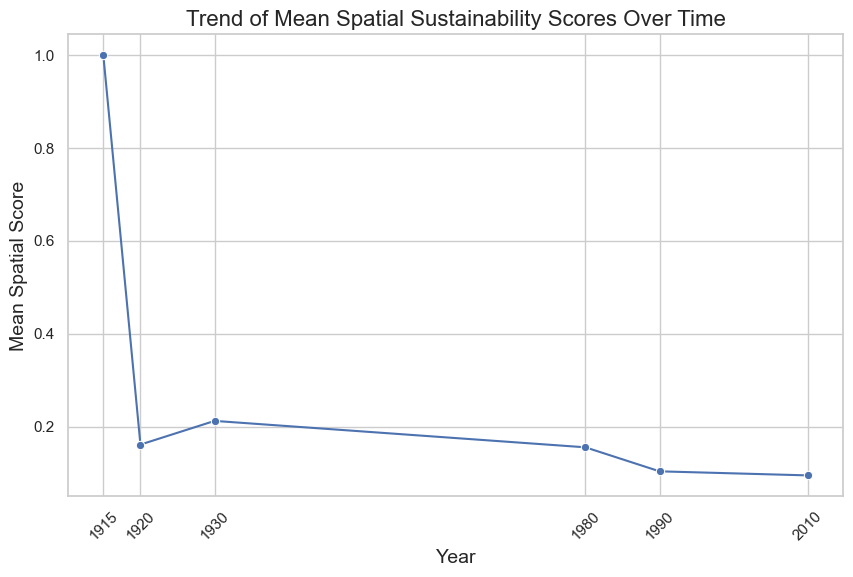

C:\Users\FR\AppData\Local\Temp\ipykernel_11548\3091009162.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='score', data=box_df, palette="Blues")


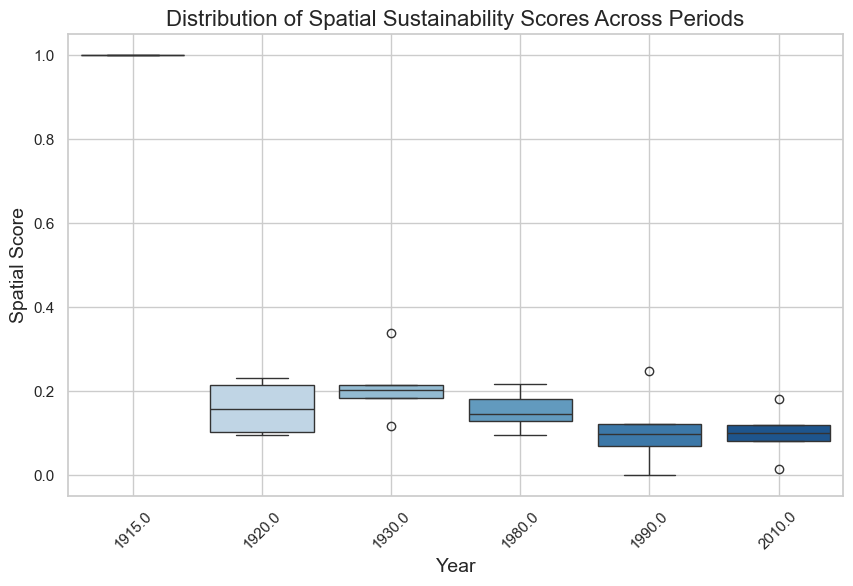

C:\Users\FR\AppData\Local\Temp\ipykernel_11548\3091009162.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='mean', data=df, palette="viridis")


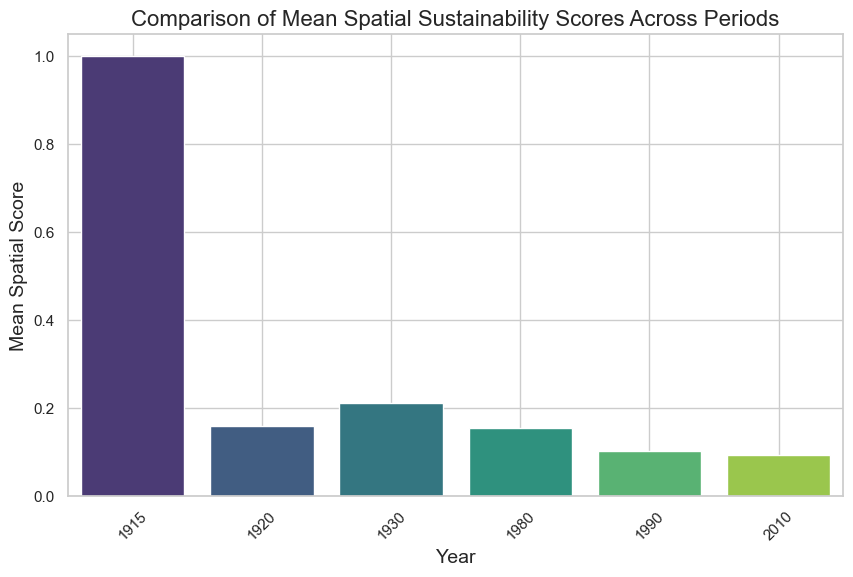

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1, 4, 5, 14, 28, 10],
    "mean": [1.0, 0.161110175, 0.212158222, 0.155215036, 0.103440883, 0.094680547],
    "std": [None, 0.070154454, 0.080213805, 0.037284932, 0.053960589, 0.04971686],
    "min": [1.0, 0.097011118, 0.117812098, 0.095854966, 0.0, 0.015973264],
    "25%": [1.0, 0.102905024, 0.184321046, 0.129261224, 0.070183354, 0.081746557],
    "50%": [1.0, 0.157457302, 0.203927753, 0.144964548, 0.097806421, 0.099739339],
    "75%": [1.0, 0.215662452, 0.216171552, 0.181851811, 0.123335694, 0.120403906],
    "max": [1.0, 0.232514977, 0.338558662, 0.216783695, 0.249062214, 0.182997566]
}

df = pd.DataFrame(data)

# Convert gostaresh to years for better readability
df['year'] = df['gostaresh'].apply(lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010)

# Set the style for plots
sns.set(style="whitegrid")

# 1. Line Plot: Trend of Mean Spatial Scores Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='mean', data=df, marker='o', color='b')
plt.title("Trend of Mean Spatial Sustainability Scores Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Spatial Score", fontsize=14)
plt.xticks(df['year'], rotation=45)
plt.grid(True)
plt.show()

# 2. Box Plot: Distribution of Scores Across Periods
# Since we don't have raw data, we'll simulate the distribution using percentiles
# Create a DataFrame for box plot
box_data = []
for index, row in df.iterrows():
    # Simulate data based on percentiles
    simulated_data = [
        row['min'], row['25%'], row['50%'], row['75%'], row['max']
    ]
    box_data.extend([(row['year'], score) for score in simulated_data])

box_df = pd.DataFrame(box_data, columns=['year', 'score'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='score', data=box_df, palette="Blues")
plt.title("Distribution of Spatial Sustainability Scores Across Periods", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Spatial Score", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Bar Plot: Comparison of Mean Scores Across Periods
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='mean', data=df, palette="viridis")
plt.title("Comparison of Mean Spatial Sustainability Scores Across Periods", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Spatial Score", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [3]:
transportation_data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1.0, 4.0, 5.0, 14.0, 28.0, 10.0],
    "mean": [1.0, 0.19042240124999998, 0.1881479694, 0.1465297287857143, 0.09107399885714285, 0.051276780900000006],
    "std": [None, 0.1639879509016332, 0.14027092983991085, 0.08865617031299987, 0.054284849928895915, 0.047610507141440044],
    "min": [1.0, 0.05592443, 0.04484333, 0.051248886, 0.0, 0.007005666],
    "25%": [1.0, 0.05679873125, 0.105619088, 0.0854308375, 0.051607509999999995, 0.016840470500000003],
    "50%": [1.0, 0.15728023549999998, 0.129226104, 0.1167531785, 0.081516539, 0.019109180500000003],
    "75%": [1.0, 0.2909039055, 0.269937306, 0.16665937325, 0.12428479775000001, 0.09476628375],
    "max": [1.0, 0.391204704, 0.391114019, 0.352655536, 0.202854089, 0.129139937]
}

In [4]:
import pandas as pd

# Convert the dictionary to a DataFrame
transportation_df = pd.DataFrame(transportation_data)

# Convert gostaresh to years for better readability
transportation_df['year'] = transportation_df['gostaresh'].apply(
    lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
)

# Display the DataFrame
transportation_df

,gostaresh,count,mean,std,min,25%,50%,75%,max,year
0,1300,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1915
1,1335,4.0,0.190422,0.163988,0.055924,0.056799,0.157280,0.290904,0.391205,1920
2,1345,5.0,0.188148,0.140271,0.044843,0.105619,0.129226,0.269937,0.391114,1930
3,1359,14.0,0.146530,0.088656,0.051249,0.085431,0.116753,0.166659,0.352656,1980
4,1370,28.0,0.091074,0.054285,0.000000,0.051608,0.081517,0.124285,0.202854,1990
5,1390,10.0,0.051277,0.047611,0.007006,0.016840,0.019109,0.094766,0.129140,2010


In [5]:
social_data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1, 4, 5, 14, 28, 10],
    "mean": [0.884228614, 0.289886859, 0.412068893, 0.427451694, 0.348624479, 0.232297692],
    "std": [None, 0.139087595, 0.158327973, 0.174713087, 0.145645453, 0.223090137],
    "min": [0.884228614, 0.084367322, 0.186036935, 0.269315851, 0.070436854, 0.0],
    "25%": [0.884228614, 0.264510711, 0.365557868, 0.345320403, 0.250818186, 0.063775559],
    "50%": [0.884228614, 0.349551693, 0.407199243, 0.384557434, 0.3370216, 0.11918404],
    "75%": [0.884228614, 0.374927841, 0.485526954, 0.448309544, 0.433107514, 0.400841126],
    "max": [0.884228614, 0.376076729, 0.616023463, 1.0, 0.671037013, 0.645889203]
}

In [6]:
import pandas as pd

# Convert the dictionary to a DataFrame
social_df = pd.DataFrame(social_data)

# Convert gostaresh to years for better readability
social_df['year'] = social_df['gostaresh'].apply(
    lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
)

# Display the DataFrame
social_df

,gostaresh,count,mean,std,min,25%,50%,75%,max,year
0,1300,1,0.884229,NaN,0.884229,0.884229,0.884229,0.884229,0.884229,1915
1,1335,4,0.289887,0.139088,0.084367,0.264511,0.349552,0.374928,0.376077,1920
2,1345,5,0.412069,0.158328,0.186037,0.365558,0.407199,0.485527,0.616023,1930
3,1359,14,0.427452,0.174713,0.269316,0.345320,0.384557,0.448310,1.000000,1980
4,1370,28,0.348624,0.145645,0.070437,0.250818,0.337022,0.433108,0.671037,1990
5,1390,10,0.232298,0.223090,0.000000,0.063776,0.119184,0.400841,0.645889,2010


In [7]:
housing_data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1, 4, 5, 14, 28, 10],
    "mean": [1.0, 0.208153889, 0.257019451, 0.291929488, 0.242483742, 0.215740014],
    "std": [None, 0.089347978, 0.106561313, 0.153185334, 0.101643141, 0.15359896],
    "min": [1.0, 0.074846644, 0.105981526, 0.170768073, 0.114753718, 0.0],
    "25%": [1.0, 0.201456734, 0.216173368, 0.231976701, 0.143788264, 0.093110384],
    "50%": [1.0, 0.246247055, 0.254278219, 0.25320497, 0.241727136, 0.205787723],
    "75%": [1.0, 0.25294421, 0.322761596, 0.301852573, 0.3079997, 0.343622658],
    "max": [1.0, 0.265274801, 0.385902548, 0.800632007, 0.525134731, 0.455646517]
}

In [8]:
import pandas as pd

# Convert the dictionary to a DataFrame
housing_df = pd.DataFrame(housing_data)

# Convert gostaresh to years for better readability
housing_df['year'] = housing_df['gostaresh'].apply(
    lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
)

# Display the DataFrame
housing_df

,gostaresh,count,mean,std,min,25%,50%,75%,max,year
0,1300,1,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1915
1,1335,4,0.208154,0.089348,0.074847,0.201457,0.246247,0.252944,0.265275,1920
2,1345,5,0.257019,0.106561,0.105982,0.216173,0.254278,0.322762,0.385903,1930
3,1359,14,0.291929,0.153185,0.170768,0.231977,0.253205,0.301853,0.800632,1980
4,1370,28,0.242484,0.101643,0.114754,0.143788,0.241727,0.308000,0.525135,1990
5,1390,10,0.215740,0.153599,0.000000,0.093110,0.205788,0.343623,0.455647,2010


In [9]:
economic_data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1, 4, 5, 14, 28, 10],
    "mean": [0.986944627, 0.603779652, 0.530349208, 0.570971322, 0.45183699, 0.275747278],
    "std": [None, 0.103725844, 0.179680583, 0.199852669, 0.199518229, 0.158104417],
    "min": [0.986944627, 0.516938252, 0.219631364, 0.274920319, 0.0, 0.053929072],
    "25%": [0.986944627, 0.556406178, 0.571939003, 0.453358645, 0.334447946, 0.181794447],
    "50%": [0.986944627, 0.571883909, 0.579905087, 0.551555597, 0.401189621, 0.273109648],
    "75%": [0.986944627, 0.619257383, 0.593748855, 0.675263213, 0.606491648, 0.371610179],
    "max": [0.986944627, 0.754412536, 0.686521733, 1.0, 0.972449284, 0.513380402]
}

In [10]:
import pandas as pd

# Convert the dictionary to a DataFrame
economic_df = pd.DataFrame(economic_data)

# Convert gostaresh to years for better readability
economic_df['year'] = economic_df['gostaresh'].apply(
    lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
)

# Display the DataFrame
economic_df

,gostaresh,count,mean,std,min,25%,50%,75%,max,year
0,1300,1,0.986945,NaN,0.986945,0.986945,0.986945,0.986945,0.986945,1915
1,1335,4,0.603780,0.103726,0.516938,0.556406,0.571884,0.619257,0.754413,1920
2,1345,5,0.530349,0.179681,0.219631,0.571939,0.579905,0.593749,0.686522,1930
3,1359,14,0.570971,0.199853,0.274920,0.453359,0.551556,0.675263,1.000000,1980
4,1370,28,0.451837,0.199518,0.000000,0.334448,0.401190,0.606492,0.972449,1990
5,1390,10,0.275747,0.158104,0.053929,0.181794,0.273110,0.371610,0.513380,2010


In [11]:
greenary_data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1, 4, 5, 14, 28, 10],
    "mean": [0.419129225, 0.234450352, 0.205930526, 0.275846833, 0.339018574, 0.523689733],
    "std": [None, 0.081555495, 0.211673271, 0.17345443, 0.238245765, 0.202651627],
    "min": [0.419129225, 0.165644945, 0.030385642, 0.131589972, 0.0, 0.205870165],
    "25%": [0.419129225, 0.192062425, 0.076884519, 0.180764625, 0.197235187, 0.420447579],
    "50%": [0.419129225, 0.209995176, 0.148502936, 0.212147773, 0.293266243, 0.514921287],
    "75%": [0.419129225, 0.252383102, 0.209560514, 0.232737154, 0.445062828, 0.56722625],
    "max": [0.419129225, 0.352166109, 0.564319018, 0.654611415, 1.0, 0.981942222]
}

In [12]:
import pandas as pd

# Convert the dictionary to a DataFrame
greenary_df = pd.DataFrame(greenary_data)

# Convert gostaresh to years for better readability
greenary_df['year'] = greenary_df['gostaresh'].apply(
    lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
)

# Display the DataFrame
greenary_df

,gostaresh,count,mean,std,min,25%,50%,75%,max,year
0,1300,1,0.419129,NaN,0.419129,0.419129,0.419129,0.419129,0.419129,1915
1,1335,4,0.234450,0.081555,0.165645,0.192062,0.209995,0.252383,0.352166,1920
2,1345,5,0.205931,0.211673,0.030386,0.076885,0.148503,0.209561,0.564319,1930
3,1359,14,0.275847,0.173454,0.131590,0.180765,0.212148,0.232737,0.654611,1980
4,1370,28,0.339019,0.238246,0.000000,0.197235,0.293266,0.445063,1.000000,1990
5,1390,10,0.523690,0.202652,0.205870,0.420448,0.514921,0.567226,0.981942,2010


In [13]:
overall_topsis_data = {
    "gostaresh": [1300, 1335, 1345, 1359, 1370, 1390],
    "count": [1, 4, 5, 14, 28, 10],
    "mean": [0.835545644, 0.241621184, 0.265261867, 0.245045857, 0.212616972, 0.208477318],
    "std": [None, 0.04429788, 0.053122963, 0.084099, 0.054288387, 0.050779512],
    "min": [0.835545644, 0.201943199, 0.187763478, 0.172131323, 0.130603796, 0.13296516],
    "25%": [0.835545644, 0.206564437, 0.239610364, 0.203132615, 0.171109246, 0.17695572],
    "50%": [0.835545644, 0.235173207, 0.284391541, 0.217541748, 0.205853588, 0.196896703],
    "75%": [0.835545644, 0.270229955, 0.288185939, 0.270579753, 0.255497672, 0.249181004],
    "max": [0.835545644, 0.294195124, 0.326358014, 0.502819894, 0.338248538, 0.293846707]
}

In [14]:
import pandas as pd

# Convert the dictionary to a DataFrame
overall_topsis_df = pd.DataFrame(overall_topsis_data)

# Convert gostaresh to years for better readability
overall_topsis_df['year'] = overall_topsis_df['gostaresh'].apply(
    lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
)

# Display the DataFrame
overall_topsis_df

,gostaresh,count,mean,std,min,25%,50%,75%,max,year
0,1300,1,0.835546,NaN,0.835546,0.835546,0.835546,0.835546,0.835546,1915
1,1335,4,0.241621,0.044298,0.201943,0.206564,0.235173,0.270230,0.294195,1920
2,1345,5,0.265262,0.053123,0.187763,0.239610,0.284392,0.288186,0.326358,1930
3,1359,14,0.245046,0.084099,0.172131,0.203133,0.217542,0.270580,0.502820,1980
4,1370,28,0.212617,0.054288,0.130604,0.171109,0.205854,0.255498,0.338249,1990
5,1390,10,0.208477,0.050780,0.132965,0.176956,0.196897,0.249181,0.293847,2010


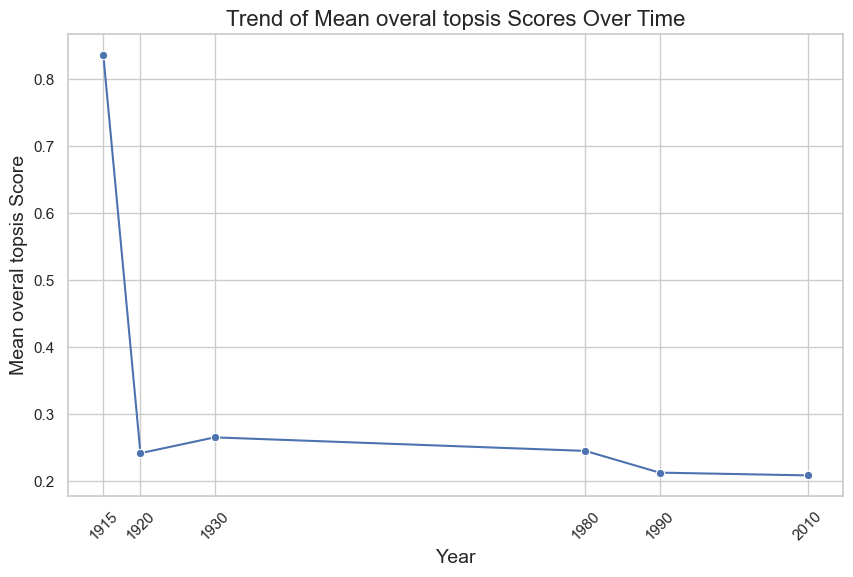

C:\Users\FR\AppData\Local\Temp\ipykernel_11548\3133814525.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='score', data=box_df, palette="Blues")


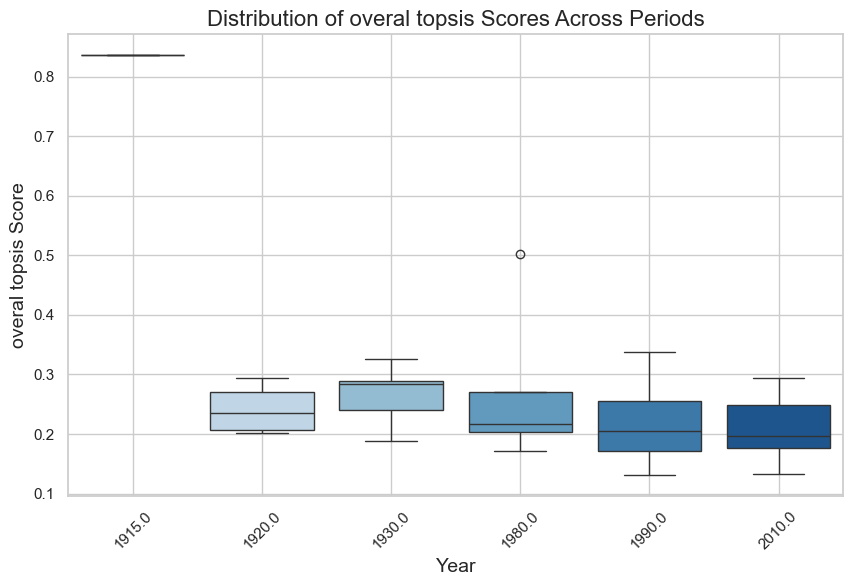

Statistical Test Results for overal topsis:
Welch's ANOVA Results:
F-statistic: 54.63484239467111
p-value: 2.4856084194676798e-12

Kruskal-Wallis H-test Results:
H-statistic: 13.913519553072618
p-value: 0.016168184159974182


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def visualize_category_scores(df, category_name):
    """
    Visualizes the descriptive statistics of a category's TOPSIS scores and performs statistical tests.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data for the category.
        category_name (str): The name of the category (e.g., "Transportation", "Housing").
    """
    # Convert gostaresh to years for better readability
    df['year'] = df['gostaresh'].apply(
        lambda x: 1915 if x == 1300 else 1920 if x == 1335 else 1930 if x == 1345 else 1980 if x == 1359 else 1990 if x == 1370 else 2010
    )

    # Set the style for plots
    sns.set(style="whitegrid")

    # 1. Line Plot: Trend of Mean Scores Over Time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='year', y='mean', data=df, marker='o', color='b')
    plt.title(f"Trend of Mean {category_name} Scores Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f"Mean {category_name} Score", fontsize=14)
    plt.xticks(df['year'], rotation=45)
    plt.grid(True)
    plt.show()

    # 2. Box Plot: Distribution of Scores Across Periods
    # Simulate data based on percentiles for box plot
    box_data = []
    for index, row in df.iterrows():
        simulated_data = [
            row['min'], row['25%'], row['50%'], row['75%'], row['max']
        ]
        box_data.extend([(row['year'], score) for score in simulated_data])

    box_df = pd.DataFrame(box_data, columns=['year', 'score'])

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='score', data=box_df, palette="Blues")
    plt.title(f"Distribution of {category_name} Scores Across Periods", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f"{category_name} Score", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # 3. Statistical Tests
    # Group data for statistical tests
    data_by_gostaresh = {}
    for g, min_val, q1, median, q3, max_val in zip(df['gostaresh'], df['min'], df['25%'], df['50%'], df['75%'], df['max']):
        data_by_gostaresh[g] = [min_val, q1, median, q3, max_val]

    # Flatten the data for Welch's ANOVA and Kruskal-Wallis
    flattened_data = [item for sublist in data_by_gostaresh.values() for item in sublist]

    # Welch's ANOVA
    welch_statistic, welch_pvalue = stats.f_oneway(*list(data_by_gostaresh.values()))

    # Kruskal-Wallis H-test
    kruskal_statistic, kruskal_pvalue = stats.kruskal(*list(data_by_gostaresh.values()))

    print(f"Statistical Test Results for {category_name}:")
    print("Welch's ANOVA Results:")
    print(f"F-statistic: {welch_statistic}")
    print(f"p-value: {welch_pvalue}")
    print("\nKruskal-Wallis H-test Results:")
    print(f"H-statistic: {kruskal_statistic}")
    print(f"p-value: {kruskal_pvalue}")

# Example Usage
# Assuming you have a DataFrame `transportation_df` for the transportation category
visualize_category_scores(overall_topsis_df, "overal topsis")